In [1]:
!pip install matplotlib

In [2]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib as mpl
import matplotlib.pyplot as plt
import math

In [3]:
%matplotlib inline

In [4]:
# read the data from the csv file
data = pd.read_csv('Boston_2017_Cleaned_Data.csv', index_col=0)
data.reset_index(inplace=True)
data = data.drop(columns='index')
data

,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type
0,2017-01-01 00:06:58,2017-01-01 00:12:49,67,139,MIT at Mass Ave / Amherst St,Dana Park,644,Subscriber
1,2017-01-01 00:13:16,2017-01-01 00:28:07,36,10,Boston Public Library - 700 Boylston St.,B.U. Central - 725 Comm. Ave.,230,Subscriber
2,2017-01-01 00:16:17,2017-01-01 00:44:10,36,9,Boston Public Library - 700 Boylston St.,Agganis Arena - 925 Comm Ave.,980,Customer
3,2017-01-01 00:21:22,2017-01-01 00:33:50,46,19,Christian Science Plaza,Buswell St. at Park Dr.,1834,Subscriber
4,2017-01-01 00:30:06,2017-01-01 00:40:28,10,8,B.U. Central - 725 Comm. Ave.,Union Square - Brighton Ave. at Cambridge St.,230,Subscriber
...,...,...,...,...,...,...,...,...
1313709,2017-12-31 23:46:18,2017-12-31 23:50:27,117,141,Binney St / Sixth St,Kendall Street,1846,Subscriber
1313710,2017-12-29 16:11:56,2017-12-29 16:16:18,54,42,Tremont St at West St,Boylston St at Arlington St TEMPORARY WINTER L...,2,Subscriber
1313711,2017-12-30 08:09:44,2017-12-30 08:26:08,54,58,Tremont St at West St,Beacon St at Arlington St,1534,Subscriber
1313712,2017-12-30 12:20:01,2017-12-30 12:49:12,54,46,Tremont St at West St,Christian Science Plaza - Massachusetts Ave at...,1978,Subscriber


# 1) Average duration of usage

In [5]:
# Convert date columns into the format of datetime.
data['start_time'] = pd.to_datetime(data['start_time'])
data['end_time'] = pd.to_datetime(data['end_time'])

In [6]:
# Add a new column to the framework named "duration" which contains the difference between the end time and the start time.
data.insert(3, 'duration', "")
data.insert(4, 'duration_in_sec', "")
data

,start_time,end_time,start_station_id,duration,duration_in_sec,end_station_id,start_station_name,end_station_name,bike_id,user_type
0,2017-01-01 00:06:58,2017-01-01 00:12:49,67,,,139,MIT at Mass Ave / Amherst St,Dana Park,644,Subscriber
1,2017-01-01 00:13:16,2017-01-01 00:28:07,36,,,10,Boston Public Library - 700 Boylston St.,B.U. Central - 725 Comm. Ave.,230,Subscriber
2,2017-01-01 00:16:17,2017-01-01 00:44:10,36,,,9,Boston Public Library - 700 Boylston St.,Agganis Arena - 925 Comm Ave.,980,Customer
3,2017-01-01 00:21:22,2017-01-01 00:33:50,46,,,19,Christian Science Plaza,Buswell St. at Park Dr.,1834,Subscriber
4,2017-01-01 00:30:06,2017-01-01 00:40:28,10,,,8,B.U. Central - 725 Comm. Ave.,Union Square - Brighton Ave. at Cambridge St.,230,Subscriber
...,...,...,...,...,...,...,...,...,...,...
1313709,2017-12-31 23:46:18,2017-12-31 23:50:27,117,,,141,Binney St / Sixth St,Kendall Street,1846,Subscriber
1313710,2017-12-29 16:11:56,2017-12-29 16:16:18,54,,,42,Tremont St at West St,Boylston St at Arlington St TEMPORARY WINTER L...,2,Subscriber
1313711,2017-12-30 08:09:44,2017-12-30 08:26:08,54,,,58,Tremont St at West St,Beacon St at Arlington St,1534,Subscriber
1313712,2017-12-30 12:20:01,2017-12-30 12:49:12,54,,,46,Tremont St at West St,Christian Science Plaza - Massachusetts Ave at...,1978,Subscriber


In [7]:
data.duration = data['end_time'] - data['start_time']
data.duration_in_sec = data.duration.dt.total_seconds().astype(int)
data

,start_time,end_time,start_station_id,duration,duration_in_sec,end_station_id,start_station_name,end_station_name,bike_id,user_type
0,2017-01-01 00:06:58,2017-01-01 00:12:49,67,0 days 00:05:51,351,139,MIT at Mass Ave / Amherst St,Dana Park,644,Subscriber
1,2017-01-01 00:13:16,2017-01-01 00:28:07,36,0 days 00:14:51,891,10,Boston Public Library - 700 Boylston St.,B.U. Central - 725 Comm. Ave.,230,Subscriber
2,2017-01-01 00:16:17,2017-01-01 00:44:10,36,0 days 00:27:53,1673,9,Boston Public Library - 700 Boylston St.,Agganis Arena - 925 Comm Ave.,980,Customer
3,2017-01-01 00:21:22,2017-01-01 00:33:50,46,0 days 00:12:28,748,19,Christian Science Plaza,Buswell St. at Park Dr.,1834,Subscriber
4,2017-01-01 00:30:06,2017-01-01 00:40:28,10,0 days 00:10:22,622,8,B.U. Central - 725 Comm. Ave.,Union Square - Brighton Ave. at Cambridge St.,230,Subscriber
...,...,...,...,...,...,...,...,...,...,...
1313709,2017-12-31 23:46:18,2017-12-31 23:50:27,117,0 days 00:04:09,249,141,Binney St / Sixth St,Kendall Street,1846,Subscriber
1313710,2017-12-29 16:11:56,2017-12-29 16:16:18,54,0 days 00:04:22,262,42,Tremont St at West St,Boylston St at Arlington St TEMPORARY WINTER L...,2,Subscriber
1313711,2017-12-30 08:09:44,2017-12-30 08:26:08,54,0 days 00:16:24,984,58,Tremont St at West St,Beacon St at Arlington St,1534,Subscriber
1313712,2017-12-30 12:20:01,2017-12-30 12:49:12,54,0 days 00:29:11,1751,46,Tremont St at West St,Christian Science Plaza - Massachusetts Ave at...,1978,Subscriber


In [8]:
# calculate the average duration of usage in seconds
average_usage_sec = sum(data.duration_in_sec)/len(data.duration_in_sec)
print("average_usage_sec: " + str(average_usage_sec))

# calculate the average duration of usage in minutes
average_usage_min = average_usage_sec/60

print("average_usage_min: " + str(average_usage_min))

average_usage_sec: 1134.8916758137616
average_usage_min: 18.914861263562692


### Average duration of usage per Month

In [9]:
data.insert(5,'start_month',"")
data.insert(6,'end_month',"")

In [10]:
# Fill the columns 'start_time_month' and 'end_time_month' with the month of the dates written in the column 'start_time', 'end_time' respectively. 
data['start_month'] = data.start_time.dt.month
data['end_month'] = data.end_time.dt.month
data

,start_time,end_time,start_station_id,duration,duration_in_sec,start_month,end_month,end_station_id,start_station_name,end_station_name,bike_id,user_type
0,2017-01-01 00:06:58,2017-01-01 00:12:49,67,0 days 00:05:51,351,1,1,139,MIT at Mass Ave / Amherst St,Dana Park,644,Subscriber
1,2017-01-01 00:13:16,2017-01-01 00:28:07,36,0 days 00:14:51,891,1,1,10,Boston Public Library - 700 Boylston St.,B.U. Central - 725 Comm. Ave.,230,Subscriber
2,2017-01-01 00:16:17,2017-01-01 00:44:10,36,0 days 00:27:53,1673,1,1,9,Boston Public Library - 700 Boylston St.,Agganis Arena - 925 Comm Ave.,980,Customer
3,2017-01-01 00:21:22,2017-01-01 00:33:50,46,0 days 00:12:28,748,1,1,19,Christian Science Plaza,Buswell St. at Park Dr.,1834,Subscriber
4,2017-01-01 00:30:06,2017-01-01 00:40:28,10,0 days 00:10:22,622,1,1,8,B.U. Central - 725 Comm. Ave.,Union Square - Brighton Ave. at Cambridge St.,230,Subscriber
...,...,...,...,...,...,...,...,...,...,...,...,...
1313709,2017-12-31 23:46:18,2017-12-31 23:50:27,117,0 days 00:04:09,249,12,12,141,Binney St / Sixth St,Kendall Street,1846,Subscriber
1313710,2017-12-29 16:11:56,2017-12-29 16:16:18,54,0 days 00:04:22,262,12,12,42,Tremont St at West St,Boylston St at Arlington St TEMPORARY WINTER L...,2,Subscriber
1313711,2017-12-30 08:09:44,2017-12-30 08:26:08,54,0 days 00:16:24,984,12,12,58,Tremont St at West St,Beacon St at Arlington St,1534,Subscriber
1313712,2017-12-30 12:20:01,2017-12-30 12:49:12,54,0 days 00:29:11,1751,12,12,46,Tremont St at West St,Christian Science Plaza - Massachusetts Ave at...,1978,Subscriber


In [11]:
# Calculate the duration of usage for each row in seconds
data['usage_in_sec'] = (data['end_time'] - data['start_time']).dt.total_seconds().astype(int)
data['usage_in_min'] = data.usage_in_sec/60

data

,start_time,end_time,start_station_id,duration,duration_in_sec,start_month,end_month,end_station_id,start_station_name,end_station_name,bike_id,user_type,usage_in_sec,usage_in_min
0,2017-01-01 00:06:58,2017-01-01 00:12:49,67,0 days 00:05:51,351,1,1,139,MIT at Mass Ave / Amherst St,Dana Park,644,Subscriber,351,5.850000
1,2017-01-01 00:13:16,2017-01-01 00:28:07,36,0 days 00:14:51,891,1,1,10,Boston Public Library - 700 Boylston St.,B.U. Central - 725 Comm. Ave.,230,Subscriber,891,14.850000
2,2017-01-01 00:16:17,2017-01-01 00:44:10,36,0 days 00:27:53,1673,1,1,9,Boston Public Library - 700 Boylston St.,Agganis Arena - 925 Comm Ave.,980,Customer,1673,27.883333
3,2017-01-01 00:21:22,2017-01-01 00:33:50,46,0 days 00:12:28,748,1,1,19,Christian Science Plaza,Buswell St. at Park Dr.,1834,Subscriber,748,12.466667
4,2017-01-01 00:30:06,2017-01-01 00:40:28,10,0 days 00:10:22,622,1,1,8,B.U. Central - 725 Comm. Ave.,Union Square - Brighton Ave. at Cambridge St.,230,Subscriber,622,10.366667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1313709,2017-12-31 23:46:18,2017-12-31 23:50:27,117,0 days 00:04:09,249,12,12,141,Binney St / Sixth St,Kendall Street,1846,Subscriber,249,4.150000
1313710,2017-12-29 16:11:56,2017-12-29 16:16:18,54,0 days 00:04:22,262,12,12,42,Tremont St at West St,Boylston St at Arlington St TEMPORARY WINTER L...,2,Subscriber,262,4.366667
1313711,2017-12-30 08:09:44,2017-12-30 08:26:08,54,0 days 00:16:24,984,12,12,58,Tremont St at West St,Beacon St at Arlington St,1534,Subscriber,984,16.400000
1313712,2017-12-30 12:20:01,2017-12-30 12:49:12,54,0 days 00:29:11,1751,12,12,46,Tremont St at West St,Christian Science Plaza - Massachusetts Ave at...,1978,Subscriber,1751,29.183333


In [12]:
# group the data by the start month
monthly_usage_sec = data.groupby('start_month')['usage_in_sec'].mean()

# calculate the average utilization in minutes per each month
monthly_usage_min = data.groupby('start_month')['usage_in_min'].mean()

display(monthly_usage_min)

start_month
1     13.120087
2     11.356841
3     15.849879
4     24.460077
5     20.214343
6     20.497892
7     21.714208
8     18.710743
9     17.715617
10    18.101679
11    14.151782
12    14.257984
Name: usage_in_min, dtype: float64

In [13]:
display(data.usage_in_min.mean())
display(monthly_usage_min.mean())
display(monthly_usage_min.max())
display(monthly_usage_min.min())

18.914861263564138

17.512594432710426

24.46007710795113

11.35684094725262

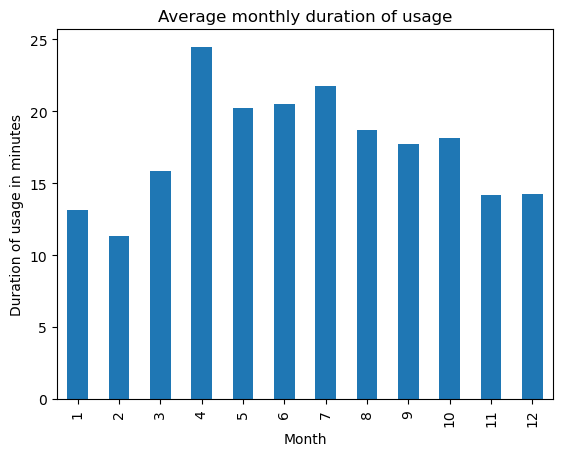

In [14]:
# create a visual representation of the "monthly_usage_min" data
monthly_usage_min.plot(kind='bar')
plt.xlabel("Month")
plt.ylabel("Duration of usage in minutes")
plt.title("Average monthly duration of usage")
plt.show()

# 2) Shares of Customers and Subscribers 

In [15]:
# calculate the share of customers and subscribers
user_type_counts = data["user_type"].value_counts(normalize = True) * 100

print(user_type_counts)

Subscriber    84.089003
Customer      15.910997
Name: user_type, dtype: float64


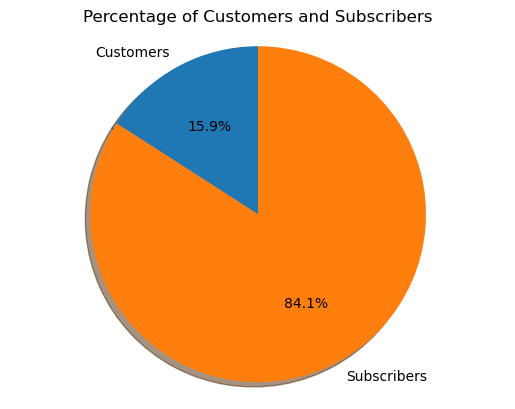

In [16]:
# pie chart
labels = ['Customers', 'Subscribers']
sizes = [user_type_counts['Customer'], user_type_counts['Subscriber']]

# plot
plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.title("Percentage of Customers and Subscribers")
plt.show()

## Shares of Customers and Subscribers per Month

In [17]:
# group the data by month and user_type and calculate the share of each user type with respect to total number of users in a respective month.
monthly_user_type = data.groupby(['start_month', 'user_type']).size().groupby(level=0).apply(lambda x: x)
monthly_user_type_shares = data.groupby(["start_month", "user_type"]).size().groupby(level=0).apply(lambda x: 100 * x / x.sum())
total_num_monthly_users = data.groupby(['start_month','user_type']).size()

series_total_num_monthly_users = pd.Series(index=monthly_user_type.index,dtype=int)
series_total_num_monthly_users[::2] = data.groupby(['start_month','user_type']).size().groupby(level=0).sum()
series_total_num_monthly_users.fillna(method='ffill')

df_monthly_user = pd.DataFrame({'abs_monthly_uses': monthly_user_type, 'total_monthly_num_of_uses':series_total_num_monthly_users, 'rel_monthly_uses': monthly_user_type_shares})
df_monthly_user['total_monthly_num_of_uses'] = df_monthly_user.total_monthly_num_of_uses.fillna(method='ffill')

df_monthly_user

abs_monthly_uses  total_monthly_num_of_uses  \
start_month user_type                                                 
1           Customer                1081                    19514.0   
            Subscriber             18433                    19514.0   
2           Customer                1060                    17271.0   
            Subscriber             16211                    17271.0   
3           Customer                1905                    31253.0   
            Subscriber             29348                    31253.0   
4           Customer               22538                    99860.0   
            Subscriber             77322                    99860.0   
5           Customer               22292                   127894.0   
            Subscriber            105602                   127894.0   
6           Customer               31054                   161910.0   
            Subscriber            130856                   161910.0   
7           Customer               40320                   175833.0   
            Subscriber            135513                   175833.0   
8           Customer               34295                   190651.0   
            Subscriber            156356                   190651.0   
9           Customer               22960                   165384.0   
            Subscriber            142424                   165384.0   
10          Customer               21224                   163615.0   
            Subscriber            142391                   163615.0   
11          Customer                8316                   105457.0   
            Subscriber             97141                   105457.0   
12          Customer                1980                    55072.0   
            Subscriber             53092                    55072.0   

                        rel_monthly_uses  
start_month user_type                     
1           Customer            5.539613  
            Subscriber         94.460387  
2           Customer            6.137456  
            Subscriber         93.862544  
3           Customer            6.095415  
            Subscriber         93.904585  
4           Customer           22.569597  
            Subscriber         77.430403  
5           Customer           17.430059  
            Subscriber         82.569941  
6           Customer           19.179791  
            Subscriber         80.820209  
7           Customer           22.930849  
            Subscriber         77.069151  
8           Customer           17.988366  
            Subscriber         82.011634  
9           Customer           13.882842  
            Subscriber         86.117158  
10          Customer           12.971916  
            Subscriber         87.028084  
11          Customer            7.885679  
            Subscriber         92.114321  
12          Customer            3.595293  
            Subscriber         96.404707

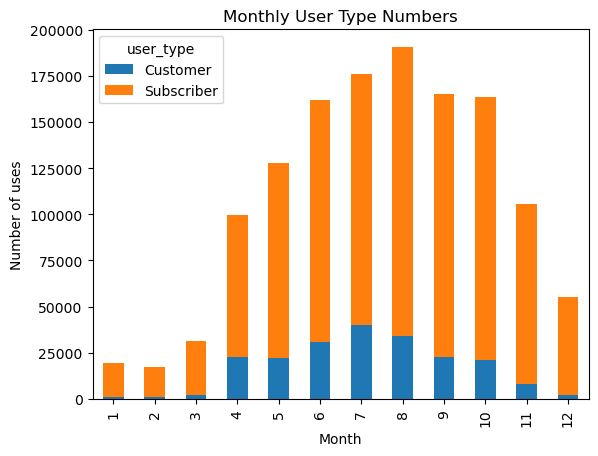

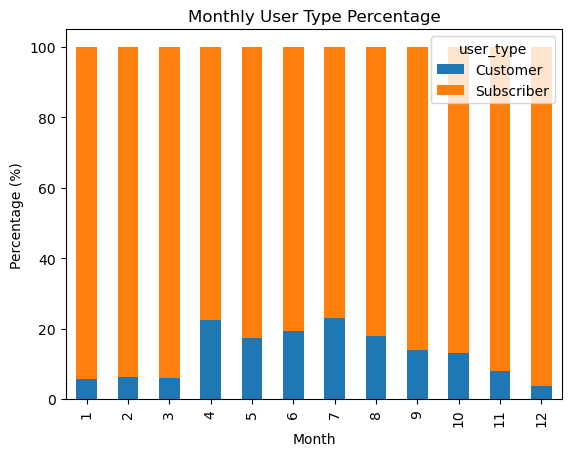

In [18]:
# create a visual representation of the "monthly_user_type" data
monthly_user_type.unstack().plot(kind = 'bar', stacked = True)
plt.xlabel("Month")
plt.ylabel("Number of uses")
plt.title("Monthly User Type Numbers")
plt.show()

monthly_user_type_shares.unstack().plot(kind = 'bar', stacked = True)
plt.xlabel("Month")
plt.ylabel("Percentage (%)")
plt.title("Monthly User Type Percentage")
plt.show()

# Ratio of Customers to Subscribers

In [19]:
# calculate the ratio of customers to subscribers by dividing the number of customers by the number of subscribers
user_type_counts = data["user_type"].value_counts()
overall_ratio = user_type_counts['Customer']/user_type_counts['Subscriber']

print(overall_ratio)

0.18921615042785797


## Ratio of Customers to Subscribers per Month

In [20]:
# calculate the monthly ratio of customers to subscribers
monthly_ratio = monthly_user_type.loc[:,'Customer'] / monthly_user_type.loc[:,'Subscriber']
monthly_ratio

start_month
1     0.058645
2     0.065388
3     0.064911
4     0.291482
5     0.211094
6     0.237314
7     0.297536
8     0.219339
9     0.161209
10    0.149054
11    0.085608
12    0.037294
dtype: float64

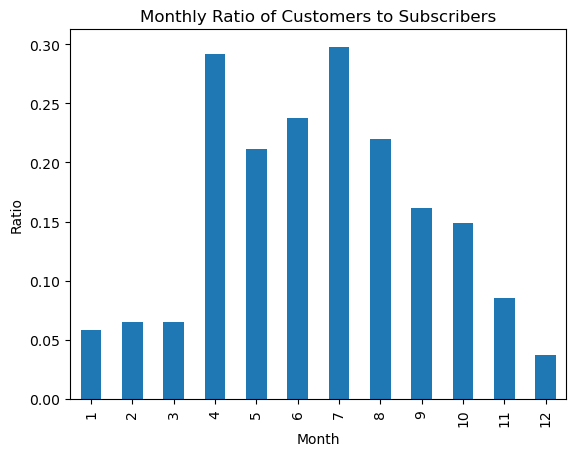

In [21]:
# create a visual representation of the "monthly_ratio" data
monthly_ratio.plot(kind='bar')
plt.xlabel("Month")
plt.ylabel("Ratio")
plt.title("Monthly Ratio of Customers to Subscribers")
plt.show()

The **Overal Ratio of Customers to Subscribers** in Boston in 2017 is 0.1892.

However, the Ratio change each month. In particular, the **Highest Ratio of Customers to Subscribers** was recorded in July (0.2975), while the **Lowest Ratio of Customers to Subscribers** was recorded in December (0.0373).

# 3) Revenue estimation

Revenues are depending on the customer type. Unfortunately, there is no historic pricing data available.
Revenue estimatition are therefore based on current prices.
As there are no further details on the subscribtion models, it is necessary to construct a subscription model based on the currently offered ones.

## The following prices are assumed:
### Subscriber: 
The currently offered annual membership is assumed to be the basis of the calculation as it will give the lowest revenue estimation which can just increase through the demand of other subscription models by the customers. It is 13 USD/month and unlimited 45-minute rides. For rides longer than 45 minutes, it is 2.5 USD per additional 30 minutes.

### Customer:
The current conditions of single trip offers is used. In this case, for rides up to 30 minutes customers are charged 2.95 USD. Above that it is an extra 4 USD per additional 30 minutes.

In [22]:
#Creates a data frame with all data columns needed from 'data'.
data_revenue = data[['start_month', 'user_type', 'duration_in_sec']]
data_revenue

,start_month,user_type,duration_in_sec
0,1,Subscriber,351
1,1,Subscriber,891
2,1,Customer,1673
3,1,Subscriber,748
4,1,Subscriber,622
...,...,...,...
1313709,12,Subscriber,249
1313710,12,Subscriber,262
1313711,12,Subscriber,984
1313712,12,Subscriber,1751


In [23]:
#Adding the duration in minutes to the data frame and drop the duration in seconds.
data_revenue['duration_in_min'] = round(data_revenue.duration_in_sec/60,2)
data_revenue = data_revenue.drop(columns='duration_in_sec')
data_revenue

C:\Users\patri\AppData\Local\Temp\ipykernel_2276\1577222464.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_revenue['duration_in_min'] = round(data_revenue.duration_in_sec/60,2)


,start_month,user_type,duration_in_min
0,1,Subscriber,5.85
1,1,Subscriber,14.85
2,1,Customer,27.88
3,1,Subscriber,12.47
4,1,Subscriber,10.37
...,...,...,...
1313709,12,Subscriber,4.15
1313710,12,Subscriber,4.37
1313711,12,Subscriber,16.40
1313712,12,Subscriber,29.18


In [24]:
data_revenue['Revenue'] = 0
data_revenue

,start_month,user_type,duration_in_min,Revenue
0,1,Subscriber,5.85,0
1,1,Subscriber,14.85,0
2,1,Customer,27.88,0
3,1,Subscriber,12.47,0
4,1,Subscriber,10.37,0
...,...,...,...,...
1313709,12,Subscriber,4.15,0
1313710,12,Subscriber,4.37,0
1313711,12,Subscriber,16.40,0
1313712,12,Subscriber,29.18,0


In [25]:
#Determine the revenues for the subscribers
subscribers = data_revenue.loc[data_revenue.user_type == 'Subscriber']
subscribers.Revenue = np.where(subscribers.duration_in_min > 45, 
                                   ((subscribers.duration_in_min-45)/30+1).astype(int)*2.5,0)
subscribers

C:\Users\patri\AppData\Local\Temp\ipykernel_2276\1569044736.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subscribers.Revenue = np.where(subscribers.duration_in_min > 45,


,start_month,user_type,duration_in_min,Revenue
0,1,Subscriber,5.85,0.0
1,1,Subscriber,14.85,0.0
3,1,Subscriber,12.47,0.0
4,1,Subscriber,10.37,0.0
5,1,Subscriber,11.08,0.0
...,...,...,...,...
1313709,12,Subscriber,4.15,0.0
1313710,12,Subscriber,4.37,0.0
1313711,12,Subscriber,16.40,0.0
1313712,12,Subscriber,29.18,0.0


In [26]:
#Determine the revenues for the customers
customers = data_revenue.loc[data_revenue.user_type == 'Customer']
customers.Revenue = np.where(customers.duration_in_min > 30, 
                                   ((customers.duration_in_min-30)/30+1).astype(int)*4+2.95,2.95)
customers

C:\Users\patri\AppData\Local\Temp\ipykernel_2276\2887229853.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customers.Revenue = np.where(customers.duration_in_min > 30,


,start_month,user_type,duration_in_min,Revenue
2,1,Customer,27.88,2.95
9,1,Customer,15.90,2.95
11,1,Customer,16.95,2.95
16,1,Customer,22.88,2.95
25,1,Customer,24.98,2.95
...,...,...,...,...
1313576,12,Customer,4.22,2.95
1313601,12,Customer,47.38,6.95
1313605,12,Customer,46.63,6.95
1313606,12,Customer,39.87,6.95


In [27]:
#Combine the revenues of subscribers and customers
data_revenue = pd.concat([subscribers, customers], axis=0)
data_revenue.sort_values('start_month')
data_revenue

,start_month,user_type,duration_in_min,Revenue
0,1,Subscriber,5.85,0.00
1,1,Subscriber,14.85,0.00
3,1,Subscriber,12.47,0.00
4,1,Subscriber,10.37,0.00
5,1,Subscriber,11.08,0.00
...,...,...,...,...
1313576,12,Customer,4.22,2.95
1313601,12,Customer,47.38,6.95
1313605,12,Customer,46.63,6.95
1313606,12,Customer,39.87,6.95


In [28]:
#Show revenues from rides depending on start_month and user_type
revenue_monthly = data_revenue.groupby(by=['start_month','user_type']).sum()
revenue_monthly = revenue_monthly.drop(columns='duration_in_min')
revenue_monthly

Revenue
start_month user_type            
1           Customer      9884.95
            Subscriber    2205.00
2           Customer      8183.00
            Subscriber     795.00
3           Customer     18471.75
            Subscriber    7327.50
4           Customer    182751.10
            Subscriber   28332.50
5           Customer    175449.40
            Subscriber   17797.50
6           Customer    219621.30
            Subscriber   23710.00
7           Customer    295608.00
            Subscriber   16090.00
8           Customer    224746.25
            Subscriber   15215.00
9           Customer    166352.00
            Subscriber   11902.50
10          Customer    162846.80
            Subscriber   19740.00
11          Customer     55436.20
            Subscriber    7272.50
12          Customer     20401.00
            Subscriber    6400.00

In [29]:
#adding the fixed fee of 13$ per month for the subscribers.
#According to Bluebikes' webiste an annual membership costs $13 per month (https://www.bluebikes.com/pricing).
#For 2017 the company lists 14,577 annual members (https://www.bluebikes.com/system-data).

for i in range(12):
    revenue_monthly.loc[(i+1,'Subscriber'),'Revenue'] = revenue_monthly.loc[(i+1,'Subscriber'),'Revenue'] + (13*14577)
    
revenue_monthly

Revenue
start_month user_type            
1           Customer      9884.95
            Subscriber  191706.00
2           Customer      8183.00
            Subscriber  190296.00
3           Customer     18471.75
            Subscriber  196828.50
4           Customer    182751.10
            Subscriber  217833.50
5           Customer    175449.40
            Subscriber  207298.50
6           Customer    219621.30
            Subscriber  213211.00
7           Customer    295608.00
            Subscriber  205591.00
8           Customer    224746.25
            Subscriber  204716.00
9           Customer    166352.00
            Subscriber  201403.50
10          Customer    162846.80
            Subscriber  209241.00
11          Customer     55436.20
            Subscriber  196773.50
12          Customer     20401.00
            Subscriber  195901.00

In [30]:
display(revenue_monthly.groupby('start_month').sum())
display(revenue_monthly.groupby('start_month').sum().max())
display(revenue_monthly.groupby('start_month').sum().min())

,Revenue
start_month,
1,201590.95
2,198479.00
3,215300.25
4,400584.60
5,382747.90
6,432832.30
7,501199.00
8,429462.25
9,367755.50


Revenue    501199.0
dtype: float64

Revenue    198479.0
dtype: float64

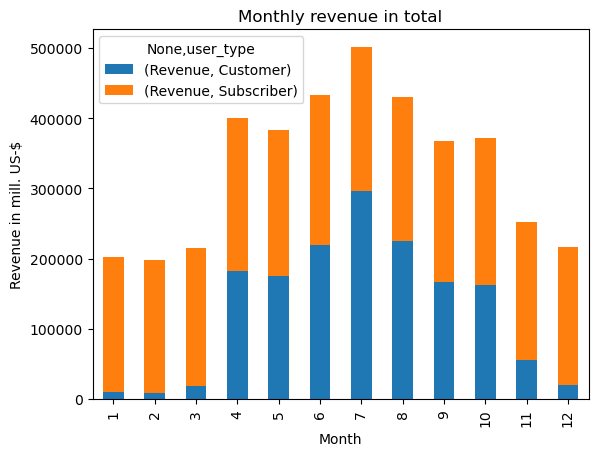

In [31]:
# create a visualization of the monthly revenue data
revenue_monthly.unstack().plot(kind = 'bar', stacked = True)
plt.xlabel("Month")
plt.ylabel("Revenue in mill. US-$")
plt.title("Monthly revenue in total")
plt.show()

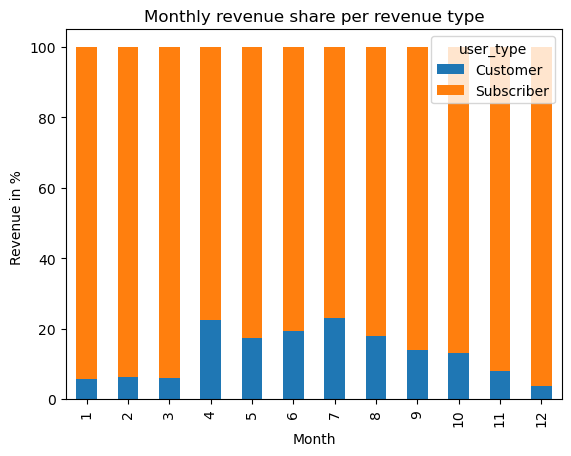

In [32]:
# create a visualization of the monthly revenue data
monthly_user_type_shares.unstack().plot(kind = 'bar', stacked = True)
plt.xlabel("Month")
plt.ylabel("Revenue in % ")
plt.title("Monthly revenue share per revenue type")
plt.show()

# 4) Utilization rate

In [33]:
# Convert date columns into the format of datetime.
data['start_time'] = pd.to_datetime(data['start_time'])
data['end_time'] = pd.to_datetime(data['end_time'])

In [34]:
# Calculate total number of bikes (in use). 
#While doing so, save the highest bike ID that is included in the data as well as the total number of unique bike IDs.
groupedByBike = data.groupby('bike_id')['start_station_name']

noBikeIDs = len(groupedByBike.count())

In [35]:
# Calculate the number / percentage of bikes used each day by creating a list of bikes used on a daily basis and do so for every day of the year.
usedPerDay = pd.DataFrame(columns=list(['day', 'number_bikes_used', '%_bikes_used']))

startdate = dt.datetime(2017, 1, 1, 0)

for x in range(365):
    f = data[(data["start_time"] <= startdate+dt.timedelta(days=x+1))
             & (data["end_time"] >= startdate+dt.timedelta(days=x))]
    usedPerDay.loc[x] = [startdate+dt.timedelta(days=x), f["bike_id"].count(), len(f["bike_id"].unique())/noBikeIDs*100]

usedPerDay

,day,number_bikes_used,%_bikes_used
0,2017-01-01,481,15.572859
1,2017-01-02,799,22.858732
2,2017-01-03,653,21.579533
3,2017-01-04,1535,33.926585
4,2017-01-05,1332,31.201335
...,...,...,...
360,2017-12-27,476,16.907675
361,2017-12-28,420,15.461624
362,2017-12-29,412,15.239155
363,2017-12-30,247,9.677419


In [36]:
display(usedPerDay.loc[usedPerDay['%_bikes_used'] == (usedPerDay['%_bikes_used'].max())])
display(usedPerDay.loc[usedPerDay['%_bikes_used'] == (usedPerDay['%_bikes_used'].min())])

,day,number_bikes_used,%_bikes_used
185,2017-07-05,6598,71.245829


,day,number_bikes_used,%_bikes_used
43,2017-02-13,38,1.835373


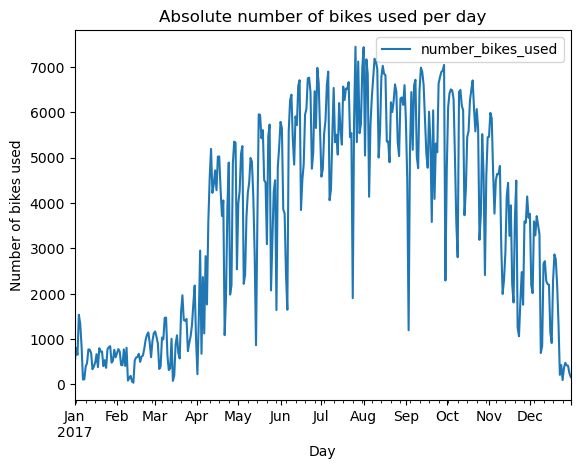

In [37]:
usedPerDay.plot(x="day", y="number_bikes_used")
plt.xlabel("Day")
plt.ylabel("Number of bikes used")
plt.title("Absolute number of bikes used per day")
plt.show()

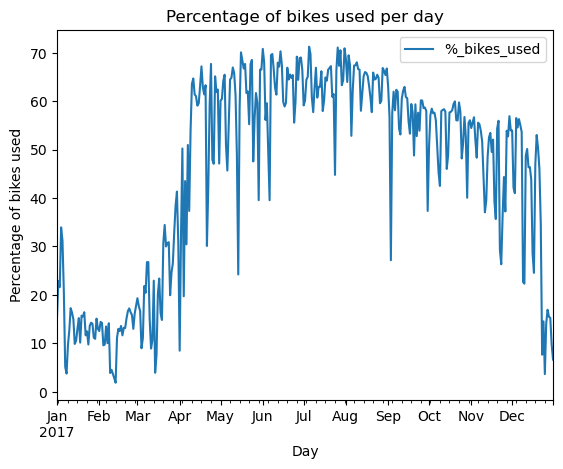

In [38]:
usedPerDay.plot(x="day", y="%_bikes_used")
plt.xlabel("Day")
plt.ylabel("Percentage of bikes used")
plt.title("Percentage of bikes used per day")
plt.show()

In [39]:
usedPerMonth = usedPerDay.groupby(usedPerDay['day'].dt.strftime('%B'))['number_bikes_used'].mean()

usedPerMonth

day
April        3350.066667
August       6177.580645
December     1783.225806
February      618.607143
January       631.419355
July         5708.354839
June         5428.700000
March        1012.903226
May          4153.903226
November     3528.400000
October      5302.903226
September    5535.166667
Name: number_bikes_used, dtype: float64

In [40]:
usedPerMonth = usedPerDay.groupby(usedPerDay['day'].dt.strftime('%B'))['%_bikes_used'].mean()

usedPerMonth

day
April        51.499815
August       64.329542
December     34.881051
February     11.808756
January      14.751157
July         63.854103
June         63.524286
March        22.042413
May          59.453156
November     47.890248
October      54.379418
September    56.484983
Name: %_bikes_used, dtype: float64